In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
sv = pd.read_csv('US_Accidents_Dec20_updated.csv')

In [3]:
sv.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [4]:
#converts an existing column to a categorical variable
sv.astype('category')

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [54]:
#Cloumn names in the dataset
print('Column names in the dataset are: \n{}'.format(('\n').join(sv.columns)))

Column names in the dataset are: 
ID
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight


In [56]:
# Data types
column_datatypes = set()
for column in sv.columns:
    column_datatypes.add(str(sv[column].dtype))
print("The dataset contains {} different data types and they are: {}".format(len(column_datatypes), ", ".join(column_datatypes)))



The dataset contains 4 different data types and they are: float64, int64, object, bool


In [67]:

X = sv.drop(columns='Severity')
y = sv['Severity']

In [69]:

numerical_features = list()
categorical_features = list()
for column in X.columns:
    # In the dataset we only have float and int64.
    if (sv[column].dtype == 'float64' or sv[column].dtype == 'int64'):
        numerical_features.append(column)
    # Categorical
    elif (sv[column].dtype == 'object'):
        categorical_features.append(column)

In [70]:
#Numerical features in the dataset
print('There are a total of {} numerical features in the dataset.'.format(len(numerical_features)))

There are a total of 13 numerical features in the dataset.


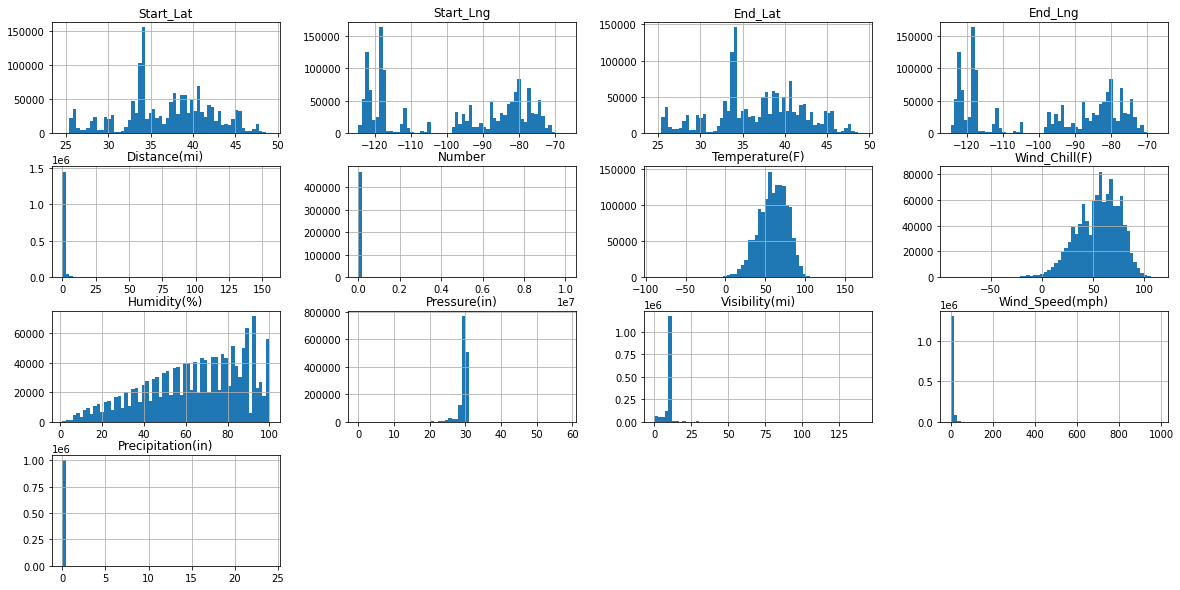

In [71]:
X_num_total = X[numerical_features]


X_num_total.hist(bins=60,figsize=(20, 10))
plt.show()

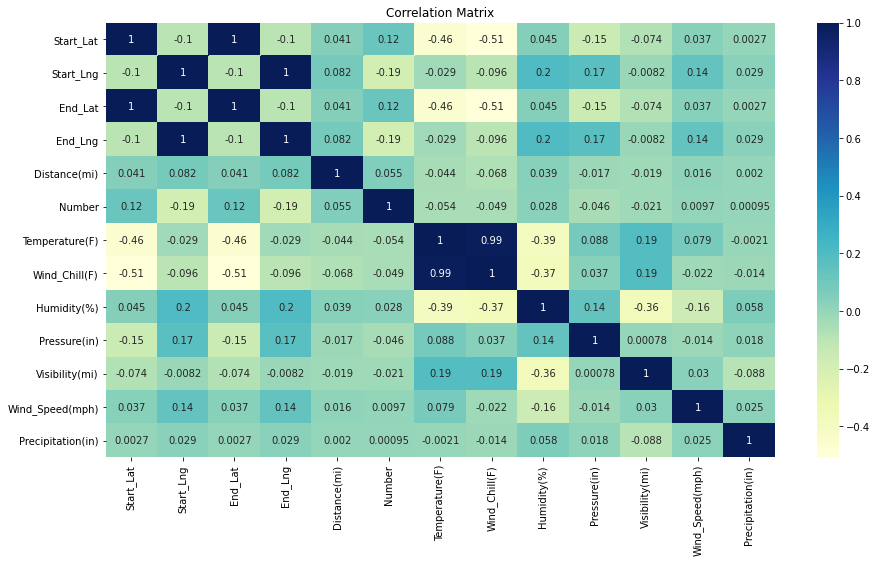

In [72]:
# Checking the correlation between the numerical features
plt.subplots(figsize=(15,8))
sns.heatmap(X_num_total.corr(), cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

In [74]:
#Categorical features
print('There are a total of {} categorical features in the dataset.'.format(len(categorical_features)))

There are a total of 20 categorical features in the dataset.


In [75]:
X_cat_total = X[categorical_features]

print('Unique values for each categorical column are:\n {}'.format(X_cat_total.nunique()))

Unique values for each categorical column are:
 ID                       1516064
Start_Time               1037092
End_Time                 1161415
Description               527655
Street                     93048
Side                           2
City                       10657
County                      1671
State                         49
Zipcode                   177196
Country                        1
Timezone                       4
Airport_Code                1985
Weather_Timestamp         331748
Wind_Direction                24
Weather_Condition            116
Sunrise_Sunset                 2
Civil_Twilight                 2
Nautical_Twilight              2
Astronomical_Twilight          2
dtype: int64


In [52]:
#To check if any null values exist in the dataset
format(sv.isnull().values.any())


'True'

In [5]:
#detects the missing values in the dataset
sv.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [6]:
#drop columns that are not required
sv_main=sv.drop(columns=['ID','End_Lat','End_Lng','Number',
                         'Wind_Chill(F)','Zipcode','Country','Timezone','Airport_Code',
                         'Wind_Direction','Weather_Timestamp','Temperature(F)','Humidity(%)',
                         'Pressure(in)','Precipitation(in)'])


In [7]:
#handling the missing values
sv_main['City']=sv_main['City'].fillna("Unknown")
sv_main['Sunrise_Sunset']=sv_main['Sunrise_Sunset'].fillna("Unknown")
sv_main['Civil_Twilight']=sv_main['Civil_Twilight'].fillna("Unknown")
sv_main['Nautical_Twilight']=sv_main['Nautical_Twilight'].fillna("Unknown")
sv_main['Astronomical_Twilight']=sv_main['Astronomical_Twilight'].fillna("Unknown")
sv_main['Weather_Condition']=sv_main['Weather_Condition'].fillna("Unknown")
sv_main['Visibility(mi)'].fillna(sv_main['Visibility(mi)'].median(), inplace=True)
sv_main['Wind_Speed(mph)'].fillna(sv_main['Wind_Speed(mph)'].median(), inplace=True)


sv_main=sv_main[sv_main.City != "Unknown"]
sv_main=sv_main[sv_main.Sunrise_Sunset != "Unknown"]
sv_main=sv_main[sv_main.Civil_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Nautical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Astronomical_Twilight != "Unknown"]
sv_main=sv_main[sv_main.Weather_Condition != "Unknown"]

In [8]:
sv_main

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,Outerbelt E,R,Dublin,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,0.747,At OH-4/OH-235/Exit 41 - Accident.,I-70 E,R,Dayton,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,0.055,At I-71/US-50/Exit 1 - Accident.,I-75 S,R,Cincinnati,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,0.219,At I-71/US-50/Exit 1 - Accident.,US-50 E,R,Cincinnati,...,False,False,False,False,False,False,Night,Night,Night,Day
4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,0.123,At Dart Ave/Exit 21 - Accident.,I-77 N,R,Akron,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,0.543,At Market St - Accident.,Pomona Fwy E,R,Riverside,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,R,San Diego,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,R,Orange,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,R,Culver City,...,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
new_sv = sv[['ID','Severity','Start_Time','Side','City','County','State','Visibility(mi)','Weather_Condition']]

In [10]:
new_sv

,ID,Severity,Start_Time,Side,City,County,State,Visibility(mi),Weather_Condition
0,A-2716600,3,2016-02-08 00:37:08,R,Dublin,Franklin,OH,10.0,Light Rain
1,A-2716601,2,2016-02-08 05:56:20,R,Dayton,Montgomery,OH,10.0,Light Rain
2,A-2716602,2,2016-02-08 06:15:39,R,Cincinnati,Hamilton,OH,10.0,Overcast
3,A-2716603,2,2016-02-08 06:15:39,R,Cincinnati,Hamilton,OH,10.0,Overcast
4,A-2716604,2,2016-02-08 06:51:45,R,Akron,Summit,OH,10.0,Overcast
...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,R,Riverside,Riverside,CA,10.0,Fair
1516060,A-4239403,2,2019-08-23 19:11:30,R,San Diego,San Diego,CA,10.0,Fair
1516061,A-4239404,2,2019-08-23 19:00:21,R,Orange,Orange,CA,10.0,Partly Cloudy
1516062,A-4239405,2,2019-08-23 19:00:21,R,Culver City,Los Angeles,CA,10.0,Fair


d:\python jupiter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Severity', ylabel='Visibility(mi)'>

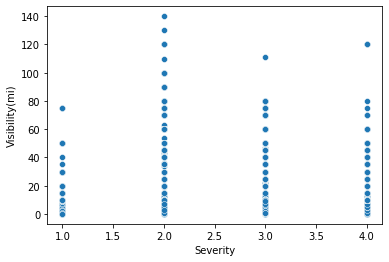

In [12]:
#Scatter plot to get the Severity vs the Visibility
sns.scatterplot(new_sv['Severity'], new_sv['Visibility(mi)'])

d:\python jupiter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Severity', ylabel='Weather_Condition'>

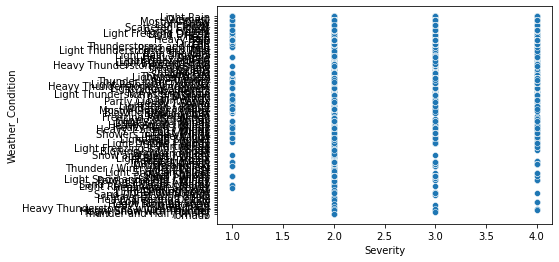

In [13]:
#Scatter plot to get the Severity vs the Visibility
sns.scatterplot(new_sv['Severity'], new_sv['Weather_Condition'])


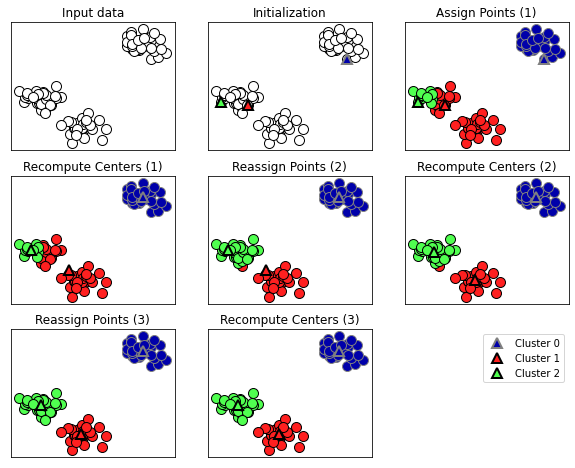

In [2]:
import warnings
import mglearn
warnings.filterwarnings('ignore')

mglearn.plots.plot_kmeans_algorithm()

d:\python jupiter\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Severity', ylabel='Weather_Condition'>

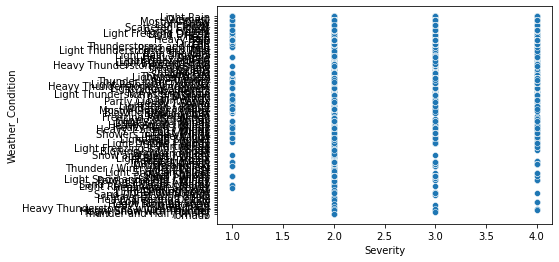

In [25]:
sns.scatterplot(new_sv['Severity'], new_sv['Weather_Condition'])

In [36]:
cord=new_sv[['Severity','Visibility(mi)']].values
cord

array([[ 3., 10.],
       [ 2., 10.],
       [ 2., 10.],
       ...,
       [ 2., 10.],
       [ 2., 10.],
       [ 2.,  7.]])

In [47]:
df = pd.DataFrame(new_sv)
df1 = df.copy()
df1 = df1.astype({"Severity": "float64",\
                  "Visibility(mi)": 'int32'}, errors='ignore')

In [48]:

from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import numpy as np

X = (cord)
K = range(1,20)


KM = [kmeans(X,k) for k in K] #
centroids = [cent for (cent,var) in KM]   

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]

cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

ValueError: array must not contain infs or NaNs

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The elbow method', fontsize = 20)
plt.xlabel = ('Number of clusters')
plt.ylabel('wcss')
plt.show()

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
#changing the date time format
new_sv['time'] = pd.to_datetime(new_sv.Start_Time, format='%Y-%m-%d %H:%M:%S')

d:\python jupiter\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


d:\python jupiter\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


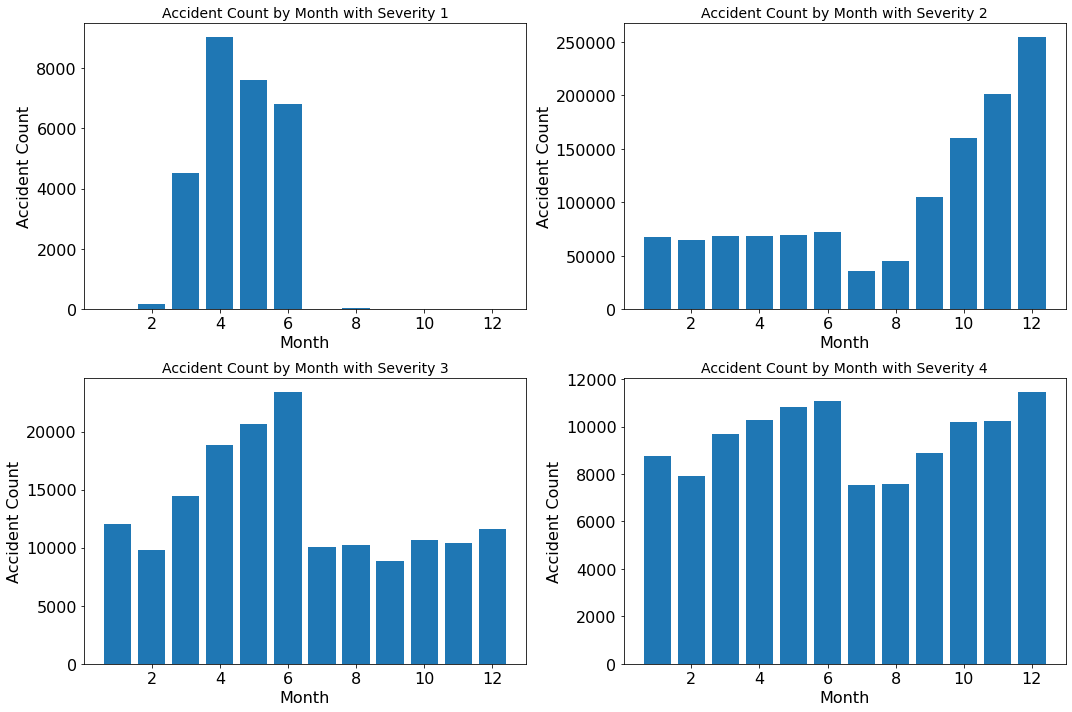

In [18]:

new_sv['time'] = pd.to_datetime(new_sv.Start_Time, format='%Y-%m-%d %H:%M:%S')

plt.subplots(2,2,figsize=(15,10))
for s in np.arange(1,5):
    plt.subplot(2,2,s)
    plt.hist(pd.DatetimeIndex(new_sv.loc[new_sv["Severity"] == s]['time']).month, bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(s), fontsize=14)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()